# Fictional Story: AdBoost Marketing Agency

____________

# Introduction
In the vibrant city of Adopolis, AdBoost Marketing Agency had established itself as a leader in optimizing advertising strategies for local businesses. However, their long-time client, RefreshCo—a popular beverage company—was facing a pressing challenge. Despite their substantial investment in advertising, sales had plateaued. Sarah, the CEO of RefreshCo, turned to AdBoost for a data-driven approach to enhance their marketing effectiveness.

# The Challenge
Sarah was particularly concerned about their TV advertising efforts. She believed that TV ads played a crucial role in driving sales but lacked the necessary data to substantiate this belief. 

<span style="font-family: 'Courier New'; font-size: 18px;">=> She tasked AdBoost with analyzing the effectiveness of their advertising budget, focusing on the relationship between TV advertising and sales. </span>


<span style="font-family: 'Courier New'; font-size: 22px;"> Dataset: Advertising Sales Dataset </span><br>
<span style="font-family: 'Courier New'; font-size: 14px;"> Link: https://www.kaggle.com/datasets/ashydv/advertising-dataset </span>

_________________________

# The Investigation
As a data scientist at AdBoost, you took on the challenge. You gathered the historical advertising data for RefreshCo, which included expenditures on TV, radio, and newspapers, along with the corresponding sales figures. 
- The dataset consisted of the following columns:
    - TV: Amount spent on TV advertising (Budget for TV Advertisements in 1000 dollers)
    - Radio: Amount spent on radio advertising (Budget for Radio Advertisements in 1000 dollers)
    - Newspaper: Amount spent on newspaper advertising (Budget for Newspaper Advertisements in 1000 dollers)
    - Sales: Total sales generated (Sales Revenue in Million dollers)

____________________

## - EDA

In [1]:
# Import datasets
import pandas as pd
import numpy as np

data = pd.read_csv('../Datasets/advertising.csv')
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [3]:
# Initial Data Exploration
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


<span style="font-family: 'Courier New'; font-size: 18px;">Based on the results, there are total of 200 records. Notably, the budget for TV is significantly higher compared to the other media. Additionally, Alex observed that the minimum value for Radio is 0, which warrants further investigation. </span>

In [4]:
print(data[data['Radio'] == 0])

       TV  Radio  Newspaper  Sales
127  80.2    0.0        9.2   11.9


<span style="font-family: 'Courier New'; font-size: 18px;">Since there is only one record with a value of 0, Alex safely ignore it and do not need to pre-process this further. </span>

In [5]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [6]:
data.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [7]:
data = data.drop_duplicates()
data.shape

(200, 4)

<span style="font-family: 'Courier New'; font-size: 18px;">There are no duplicate records in the dataset, as the count remains at 200 even after attempting to drop duplicates. </span>



## - Visualization
<span style="font-family: 'Courier New'; font-size: 18px;">As Alex proceed, he started to visualize the relationships within the dataset. </span>

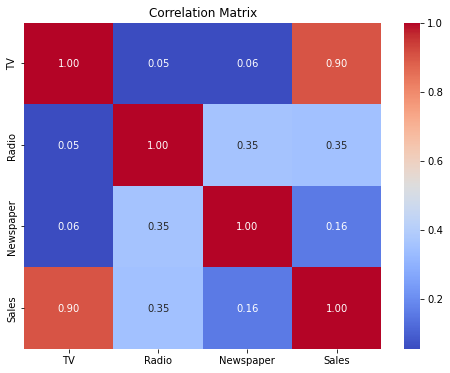

In [16]:
# Correlation Matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')

plt.title("Correlation Matrix")
plt.show()

<span style="font-family: 'Courier New'; font-size: 18px;">There is a positive correlation between TV advertising and sales, while radio and newspaper spending showed weaker correlations. </span>

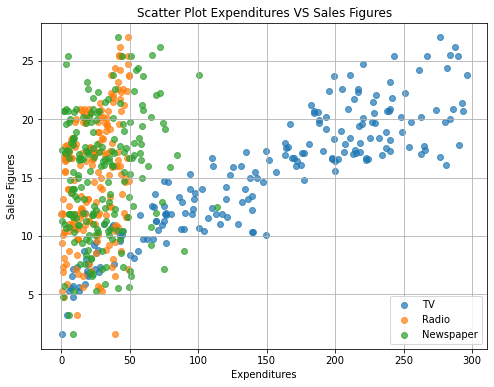

In [17]:
# Scatter plot
plt.figure(figsize=(8, 6))

# Plot each column on the x-axis
plt.scatter(data['TV'], data['Sales'], label='TV', alpha=0.7)
plt.scatter(data['Radio'], data['Sales'], label='Radio', alpha=0.7)
plt.scatter(data['Newspaper'], data['Sales'], label='Newspaper', alpha=0.7)

# Customize the plot
plt.title('Scatter Plot Expenditures VS Sales Figures')
plt.xlabel('Expenditures')
plt.ylabel('Sales Figures')
plt.legend()
plt.grid(True)
plt.show()

<span style="font-family: 'Courier New'; font-size: 18px;">Alex plotted advertising expenditure against sales. The scatter plot revealed a clear upward trend for TV, indicating that increased spending on TV ads correlated with higher sales revenue. </span>

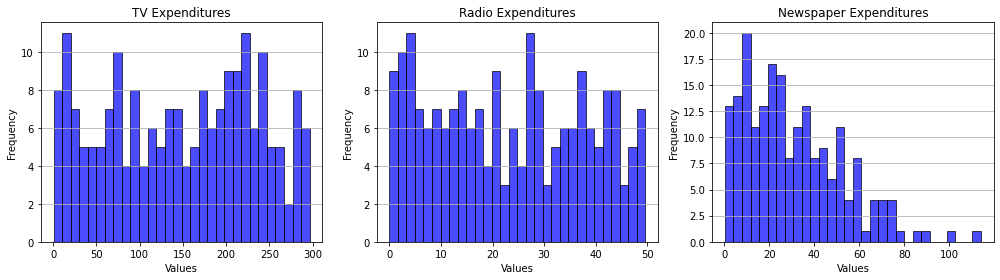

In [20]:
# Histogram
columns_to_plot = ['TV','Radio','Newspaper']
plt.figure(figsize=(14,4))

for i, column in enumerate(columns_to_plot,1):
    plt.subplot(1,3,i)
    plt.hist(data[column], bins=30, alpha=0.7,color = 'blue', edgecolor='black')
    plt.title(f"{column} Expenditures")
    plt.xlabel('Values')
    plt.ylabel("Frequency")
    plt.grid(axis='y')

plt.tight_layout()
plt.show()

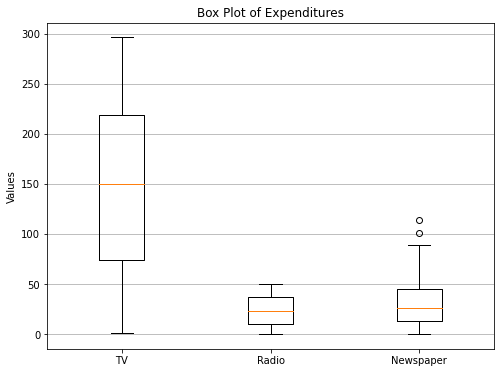

In [11]:
# Boxplot 
columns_to_plot = ['TV','Radio','Newspaper']
plt.figure(figsize=(8,6))

plt.boxplot([data[column] for column in columns_to_plot], labels=columns_to_plot)

plt.title('Box Plot of Expenditures')
plt.ylabel("Values")
plt.grid(axis='y')
plt.show()

<span style="font-family: 'Courier New'; font-size: 18px;">The above results indicate thei might be presence of outliers in the Newspaper column. However, since our primary focus is on the relationship between TV and Sales, Alex set aside this issue for now. </span><br>

<span style="font-family: 'Courier New'; font-size: 18px;">Based on the observations, Alex conclude that there is a linear relationship between the budget for TV advertisements and sales revenue. Additionally, all observations are independent, there is no multicollinearity, and the data for TV advertisements is normally distributed. </span>

## - Linear Regression
<span style="font-family: 'Courier New'; font-size: 18px;">Since data meets all the necessary conditions for linear regression, Alex and team can proceed confidently with the analysis. </span>

In [12]:
# Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

x = data[['TV']]
y = data[['Sales']]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state= 42)

model = LinearRegression()
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

In [13]:
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)

In [14]:
# Print the coefficients
print(f'Intercept: {model.intercept_}')
print(f'Coefficient for TV: {model.coef_[0]}')

# Print the evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Intercept: [7.00710843]
Coefficient for TV: [0.05548294]
Mean Squared Error: 6.101072906773963
R^2 Score: 0.802561303423698


## - Model Interpretation
<div class="alert alert-block alert-info">
<b><span style="font-family: 'Courier New'; font-size: 20px;">The Interpretation comes out as : Sales=7.007+0.055×TV</b> </span>
</div> 


<div class="alert alert-block alert-light">
    <b>
        <span style="font-family: 'Arial'; font-size: 20px;">
            Which means:
        </span>
    </b>
    <ul style="font-family: 'Arial'; font-size: 20px;">
        <li>If no budget is allocated to TV ads, sales are projected to be approximately &dollar;7M.</li>
        <li>For each &dollar;1,000 increase in the TV budget, sales increase by about 55,482.94 dollers.</li>
    </ul>
</div>


<div class="alert alert-block alert-light">
    <b>
        <span style="font-family: 'Arial'; font-size: 20px;">
            Which means:
        </span>
    </b>
    <ul style="font-family: 'Arial'; font-size: 20px;">
        <li>If no budget is allocated to TV ads, sales are projected to be approximately 7M &dollar;.</li>
        <li>For each &dollar; 1,000 increase in the TV budget, sales increase by about &dollar; 55,482.94.</li>
    </ul>
</div>

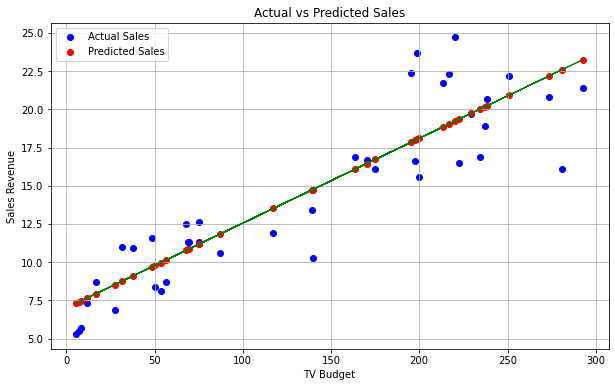

In [15]:
import matplotlib.pyplot as plt

# Flatten y_pred for plotting
y_pred_flat = y_pred.flatten()  # or use y_pred.ravel()

# Extract the values from x_test for plotting
x_test_values = x_test.values.flatten()  # or x_test.values.ravel()

# Plot the results 
plt.figure(figsize=(10, 6))
plt.scatter(x_test_values, y_test.values, color='blue', label='Actual Sales')
plt.scatter(x_test_values, y_pred_flat, color='red', label='Predicted Sales')
plt.plot(x_test_values, y_pred_flat, color='green', linewidth=1)
plt.title('Actual vs Predicted Sales')
plt.xlabel("TV Budget")
plt.ylabel("Sales Revenue")
plt.legend()
plt.grid()
plt.show()

________________

# Recommendations
Based on the analysis, Alex recommended that RefreshCo increase their TV advertising budget. He suggested strategies such as targeting peak viewing hours and creating engaging ad content to maximize impact.

__________________

# Conclusion
With data-driven insights in hand, Sarah and her team felt empowered to adjust their advertising strategy. Following the implementation of Alex’s recommendations, RefreshCo experienced a significant uptick in sales over the following months. The partnership with AdBoost flourished, leading to further successful collaborations in the competitive beverage market.


<div class="alert alert-block alert-success">
<b>END</b>
</div>